# PCA Notebook

#### *Author: Kunyu He*
#### *University of Chicago, CAPP'20*

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

### Load Data

In [65]:
wine = pd.read_csv("Wine.csv")
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


### Data Cleaning

In [66]:
wine.shape

(178, 14)

In [67]:
wine.isnull().sum(axis=0)

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

No missing data.

### Feature Selection

In [68]:
X = wine.iloc[:, :13].values.astype(float)
y = wine.Customer_Segment.values.astype(float)

### Training and Test Set Split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=123)

In [70]:
X_train.shape

(142, 13)

In [71]:
y_test.shape

(36,)

### Feature Scaling

In [72]:
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

### Feature Extraction - PCA

In [73]:
pca = PCA(random_state=123)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [74]:
print("We need the first {} principle components to account for over 80% of the variances.".\
      format(np.argmax(np.cumsum(pca.explained_variance_ratio_) > 0.8) + 1))

We need the first 5 principle components to account for over 80% of the variances.


For visualization purposes, we only use the first two PCs.

In [75]:
pca = PCA(n_components=2, random_state=123)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [76]:
X_train.shape

(142, 2)

### Model Training

In [81]:
lrc = LogisticRegression(solver='lbfgs', multi_class='multinomial',
                         random_state=123)
lrc.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=123, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

### Model Evaluation

In [82]:
test_pred = lrc.predict(X_test)

In [83]:
confusion_matrix(y_test, test_pred)

array([[ 8,  0,  0],
       [ 1, 10,  0],
       [ 0,  4, 13]], dtype=int64)

Here we provide a function for visualization of prediction regions on multilevel independent variables.

In [96]:
def actual_vs_predicted(ax, classifier, X, y, colors,
                        title=None, xlabel=None, ylabel=None,
                        edge_color="black", legend_loc="best"):
    X1, X2 = np.meshgrid(np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.01),
                         np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.01))

    ax.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).\
                                           T).reshape(X1.shape), alpha = 0.75,
                                           cmap = ListedColormap(colors))
    for i, j in enumerate(np.unique(y)):
        ax.scatter(X[y == j, 0], X[y == j, 1], c=ListedColormap(colors)(i),
                    label=j, edgecolors=edge_color, alpha=0.8)

    ax.set_xlim(X1.min(), X1.max())
    ax.set_ylim(X2.min(), X2.max())
    ax.set_title(title, fontdict={'fontsize': 15, 'fontweight': "bold"})
    ax.set_xlabel(xlabel, fontsize=13)
    ax.set_ylabel(ylabel, fontsize=13)
    ax.legend(frameon=True, framealpha=0.3, fancybox=True, fontsize=12)

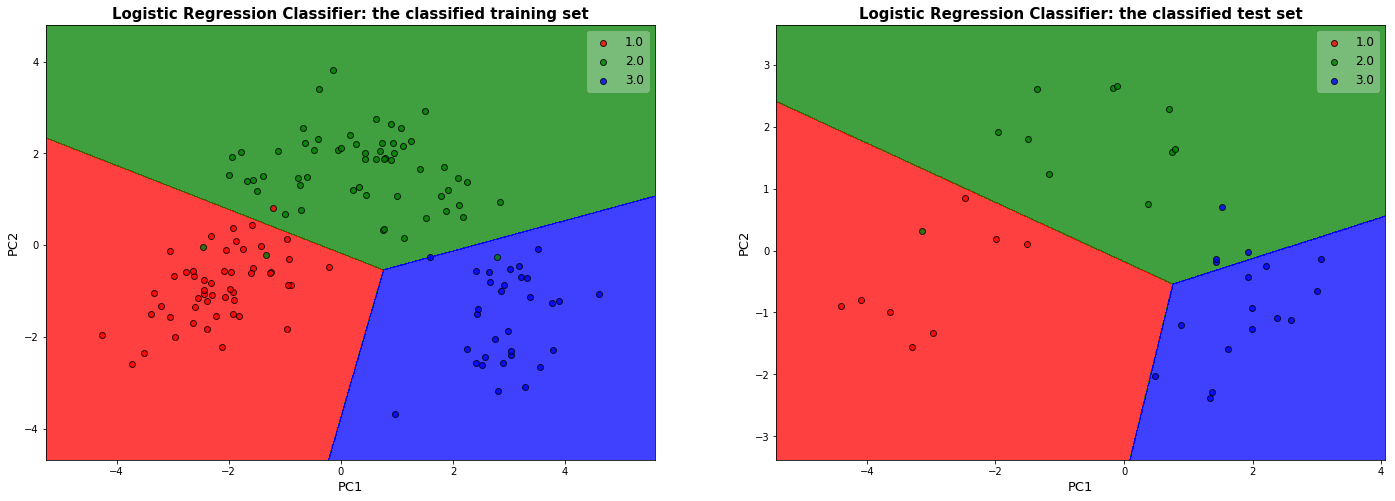

In [99]:
fig = plt.figure(figsize=[24, 8])
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

actual_vs_predicted(ax1, lrc, X_train, y_train, ["red", "green", "blue"],
                    title="Logistic Regression Classifier: the classified training set",
                    xlabel="PC1", ylabel="PC2")

actual_vs_predicted(ax2, lrc, X_test, y_test, ["red", "green", "blue"],
                    title="Logistic Regression Classifier: the classified test set",
                    xlabel="PC1", ylabel="PC2")

plt.show()